# Development optimization according to city development scenario

In [1]:
import os
import pandas as pd
import geopandas as gpd
from blocksnet.models import City
from blocksnet.method import Provision

local_crs = 32636
example_data_path = "./data"

city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))
prov = Provision(city_model=city_model)

In [2]:
scenario = {
    'school' : 0.6, 
    'kindergarten' : 0.4
}

selected_blocks = [82,83,84]

In [3]:
gdf, total = prov.calculate_scenario(scenario)
print(total)

0.6410732255757075


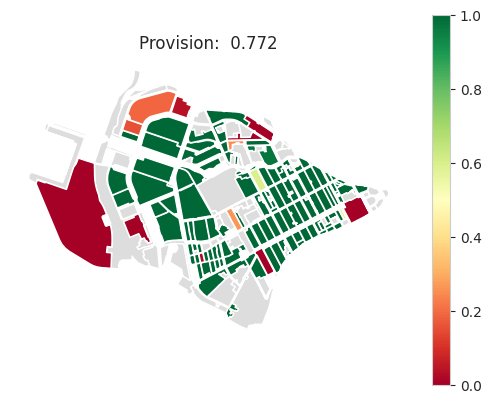

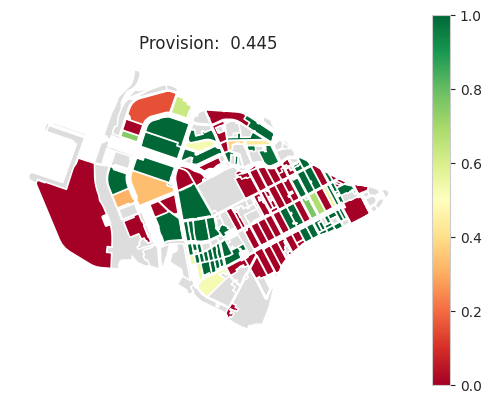

In [4]:
for k,v in gdf.items():
    prov.plot(v)

In [5]:
from blocksnet.method.genetic.genetic import Genetic
gen = Genetic(city_model=city_model, SCENARIO=scenario)

In [6]:
res = gen.calculate(3, selected_blocks=selected_blocks)

/home/vasilstar/masterplanning/venv/lib/python3.10/site-packages/pygad/pygad.py:764: UserWarning: The percentage of genes to mutate (10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate ({mutation_percent_genes[idx]}) resutled in selecting ({mutation_num_genes[idx]}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [7]:
res

{83: {'school': 0, 'kindergarten': 430},
 84: {'school': 550, 'kindergarten': 0}}

In [8]:
update_df = pd.DataFrame.from_dict(res, orient='index')
gdf, total = prov.calculate_scenario(scenario, update_df)
print(total)

0.6613488780496136


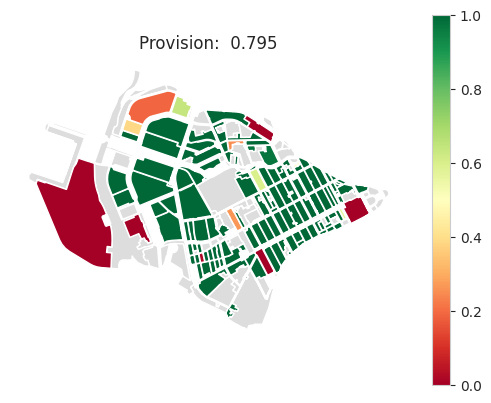

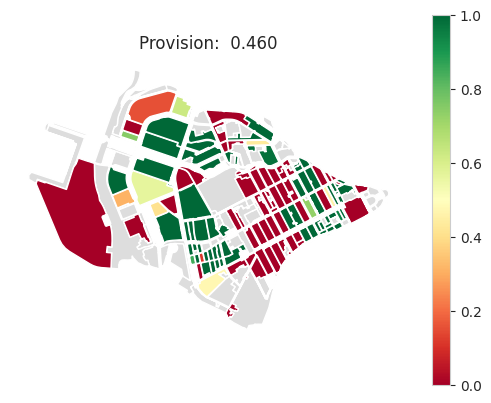

In [9]:
for k,v in gdf.items():
    prov.plot(v)